In [103]:
import pandas as pd
import os
from datetime import datetime
import tqdm

path_to_xyzs = '/Volumes/temp/AQUA/Jonas_realtid/SPRAS_2023'


In [104]:
def load_xyz_file(filepath):

    files = os.listdir(path_to_xyzs)
    files = [f for f in files if f.endswith('.XYZ')]
    lons, lats, depths, datetimes, temps, filenames = [], [], [], [], [], []

    for file in tqdm.tqdm(files):
        filepath = f'{path_to_xyzs}/{file}'
        xyz = open(filepath)
        for line in xyz:
            lat, lon, depth, date, time, temp = line.split()

            lon = float(lon[2:])
            lat = float(lat[2:])

            depth = float(depth)
            temp = float(temp)

            dt = date + time[:-3]
            dt = datetime.strptime(dt, '%d%m%Y%H%M%S')

            lons.append(lon)
            lats.append(lat)
            depths.append(depth)
            datetimes.append(dt)
            filenames.append(file)
            temps.append(temp)

    df = pd.DataFrame({'lon': lons, 'lat': lats, 'depth': depths, 'datetime': datetimes, 'temp': temps, 'filename': filenames})
    return df



In [105]:
df = load_xyz_file(path_to_xyzs)

100%|██████████| 613/613 [00:50<00:00, 12.23it/s]


In [106]:
df

,lon,lat,depth,datetime,temp,filename
0,17.167495,57.543667,101.00,2023-05-17 03:06:13,6.931,D20230517-T030450-ES38-7 Serial No 225 - Narr...
1,17.167496,57.543712,100.95,2023-05-17 03:06:14,6.914,D20230517-T030450-ES38-7 Serial No 225 - Narr...
2,17.167497,57.543758,101.01,2023-05-17 03:06:15,6.918,D20230517-T030450-ES38-7 Serial No 225 - Narr...
3,17.167497,57.543803,101.06,2023-05-17 03:06:16,6.918,D20230517-T030450-ES38-7 Serial No 225 - Narr...
4,17.167499,57.543848,101.07,2023-05-17 03:06:17,6.919,D20230517-T030450-ES38-7 Serial No 225 - Narr...
...,...,...,...,...,...,...
522905,15.594110,56.166156,12.94,2023-05-23 06:21:54,5.880,D20230523-T060948-ES38-7 Serial No 225 - Narr...
522906,15.594110,56.166156,12.93,2023-05-23 06:21:55,5.880,D20230523-T060948-ES38-7 Serial No 225 - Narr...
522907,15.594110,56.166156,12.94,2023-05-23 06:21:56,5.880,D20230523-T060948-ES38-7 Serial No 225 - Narr...
522908,15.594110,56.166156,12.94,2023-05-23 06:21:57,5.880,D20230523-T060948-ES38-7 Serial No 225 - Narr...


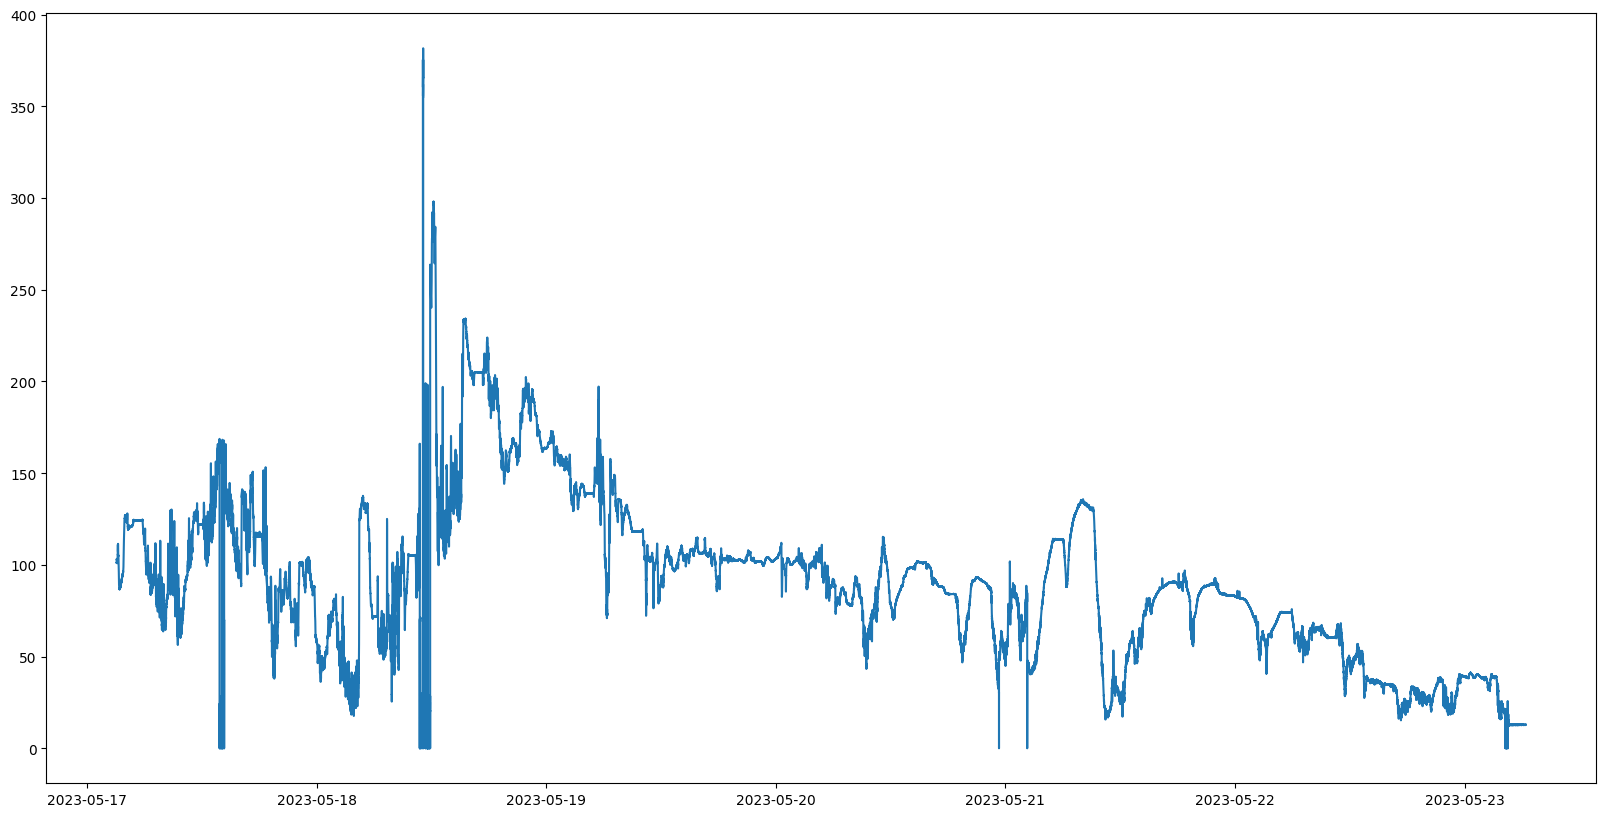

In [107]:
# Plot the depth data with a line plot

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(df['datetime'], df['depth'])
plt.show()

In [108]:
# select df rows where depth is bigger than 145 and save to an excel file
import openpyxl

selected_df = df[df['depth'] > 148]
print(selected_df)
selected_df.to_csv('deep_sea.csv')

              lon        lat   depth            datetime   temp  \
35447   17.620991  58.108546  148.66 2023-05-17 12:57:22  6.953   
35448   17.621073  58.108543  149.51 2023-05-17 12:57:23  7.089   
35449   17.621154  58.108540  149.92 2023-05-17 12:57:24  7.074   
35450   17.621237  58.108538  150.27 2023-05-17 12:57:25  6.886   
35451   17.621320  58.108536  150.75 2023-05-17 12:57:26  6.689   
...           ...        ...     ...                 ...    ...   
186415  18.151329  58.154305  148.01 2023-05-19 07:12:03  6.952   
186416  18.151327  58.154260  148.05 2023-05-19 07:12:04  6.950   
186417  18.151327  58.154214  148.11 2023-05-19 07:12:05  6.892   
186418  18.151326  58.154168  148.06 2023-05-19 07:12:06  6.846   
186419  18.151326  58.154123  148.09 2023-05-19 07:12:07  6.868   

                                                 filename  
35447   D20230517-T125401-ES38-7 Serial No  225 - Narr...  
35448   D20230517-T125401-ES38-7 Serial No  225 - Narr...  
35449   D202305

In [112]:
new_filenames = []

for filename in selected_df['filename']:
    new_filename = filename.split('-')[0] + filename.split('-')[1] + '.raw'
    if new_filename not in new_filenames:
        new_filenames.append(new_filename)

new_filenames

['D20230517T125401.raw',
 'D20230517T130855.raw',
 'D20230517T132349.raw',
 'D20230517T133843.raw',
 'D20230517T135337.raw',
 'D20230517T140831.raw',
 'D20230517T142325.raw',
 'D20230517T165225.raw',
 'D20230517T170719.raw',
 'D20230517T182149.raw',
 'D20230517T183643.raw',
 'D20230518T104515.raw',
 'D20230518T110009.raw',
 'D20230518T111503.raw',
 'D20230518T112957.raw',
 'D20230518T114451.raw',
 'D20230518T115945.raw',
 'D20230518T121439.raw',
 'D20230518T122933.raw',
 'D20230518T124427.raw',
 'D20230518T125921.raw',
 'D20230518T132909.raw',
 'D20230518T135857.raw',
 'D20230518T141351.raw',
 'D20230518T142845.raw',
 'D20230518T144339.raw',
 'D20230518T145833.raw',
 'D20230518T151327.raw',
 'D20230518T152821.raw',
 'D20230518T154315.raw',
 'D20230518T155809.raw',
 'D20230518T161303.raw',
 'D20230518T162757.raw',
 'D20230518T164251.raw',
 'D20230518T165745.raw',
 'D20230518T171239.raw',
 'D20230518T172733.raw',
 'D20230518T174227.raw',
 'D20230518T175721.raw',
 'D20230518T181215.raw',


In [113]:
with open('filenames.txt', 'w') as f:
    for item in new_filenames:
        f.write("%s\n" % item)